In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Setting the seed for reproducibility
np.random.seed(50)

# Generating random data for three groups
group1 = np.random.normal(23, 5, 30)
group2 = np.random.normal(30, 5, 30)
group3 = np.random.normal(35, 5, 30)

# Creating DataFrame
data = {'group1': group1, 'group2': group2, 'group3': group3}
df = pd.DataFrame(data)

               sum_sq    df          F        PR(>F)
C(group)  1769.830861   2.0  29.285296  1.885314e-10
Residual  2628.883837  87.0        NaN           NaN


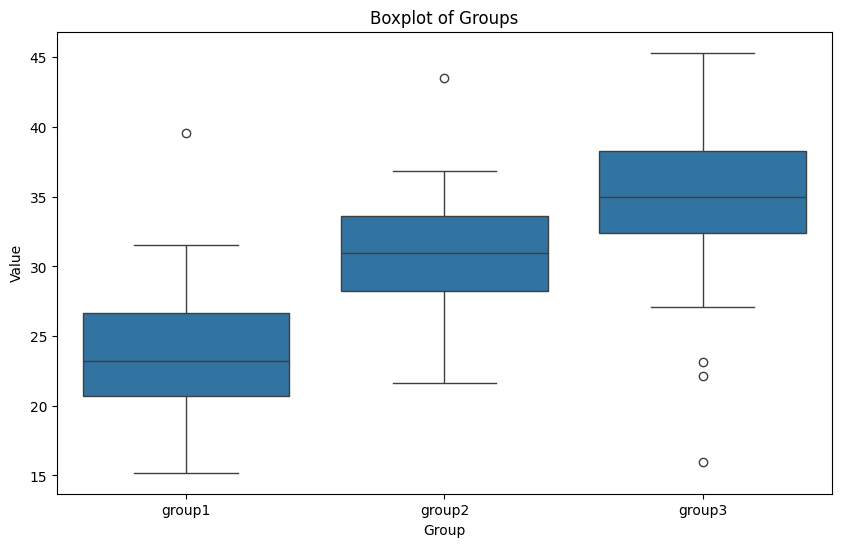

In [12]:
# ANOVA Example
formula = 'value ~ C(group)'
df_melted = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['group1', 'group2', 'group3'])
df_melted.columns = ['index', 'group', 'value']
anova_model = ols(formula, data=df_melted).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)

# Display ANOVA result
print(anova_result)

# Visualizing ANOVA Results
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='value', data=df_melted)
plt.title('Boxplot of Groups')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

Levene's test result: LeveneResult(statistic=0.13022141374551366, pvalue=0.8780718221152839)


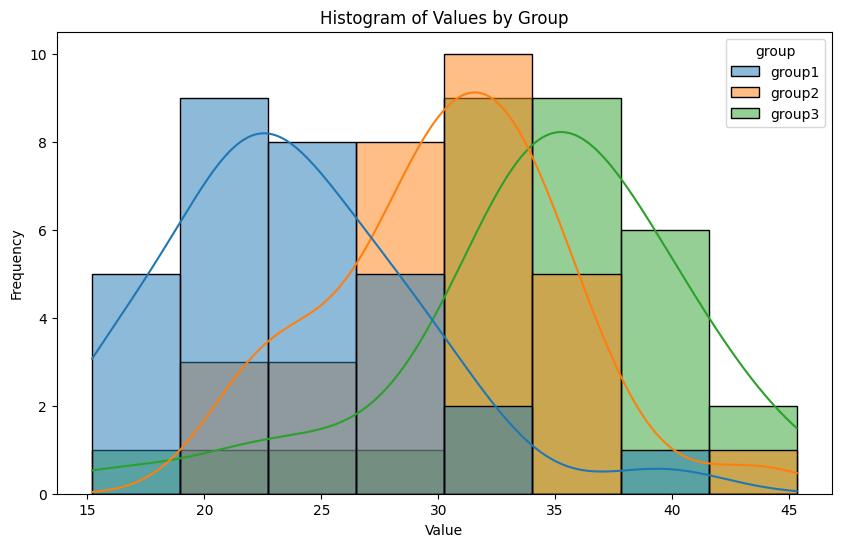

In [13]:
# Checking Assumptions: Homogeneity of variances
levene_test = stats.levene(df['group1'], df['group2'], df['group3'])
print(f"Levene's test result: {levene_test}")

# Visualizing Homogeneity of Variances
plt.figure(figsize=(10, 6))
sns.histplot(df_melted, x='value', hue='group', kde=True)
plt.title('Histogram of Values by Group')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Welch ANOVA result: TtestResult(statistic=-5.2039662659970025, pvalue=2.7170638479490136e-06, df=57.52532109336094)
Paired t-test result: TtestResult(statistic=-5.59132591997711, pvalue=4.913125213117538e-06, df=29)


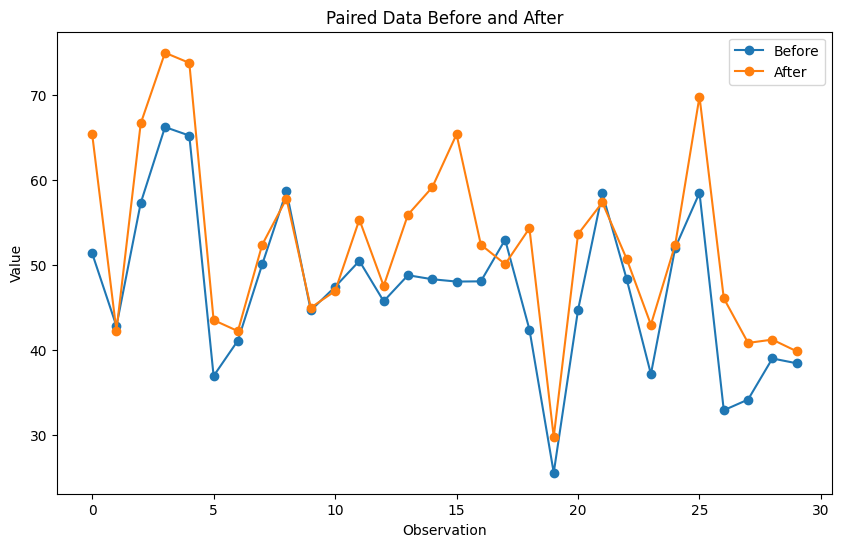

In [14]:
# Remedies: If Levene's test is significant, use Welch ANOVA
welch_anova = stats.ttest_ind(df['group1'], df['group2'], equal_var=False)
print(f"Welch ANOVA result: {welch_anova}")

# Generating random paired data
before = np.random.normal(50, 10, 30)
after = before + np.random.normal(5, 5, 30)
paired_t_test = stats.ttest_rel(before, after)
print(f"Paired t-test result: {paired_t_test}")

# Visualizing Paired Data
plt.figure(figsize=(10, 6))
plt.plot(before, label='Before', marker='o')
plt.plot(after, label='After', marker='o')
plt.title('Paired Data Before and After')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.legend()
plt.show()

Bartlett's test result: BartlettResult(statistic=1.5614137906043526, pvalue=0.45808208075532353)


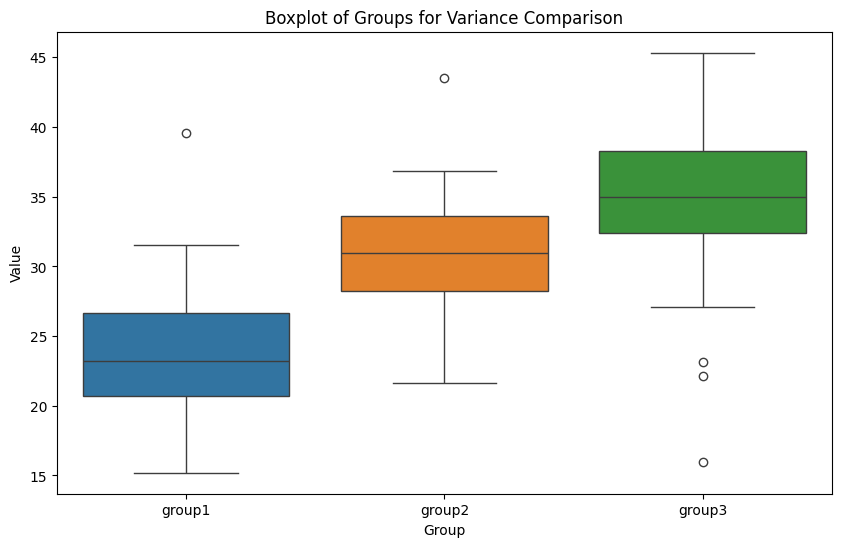

In [15]:
# F-test Example for variance comparison
variance_test = stats.bartlett(df['group1'], df['group2'], df['group3'])
print(f"Bartlett's test result: {variance_test}")

# Visualizing Variance Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Groups for Variance Comparison')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()